# Image Thresholding

## Goal
- simple thresholding, adaptive thresholding, Otsu's thresholding을 배운다.
- 함수의 사용법을 배운다 : `cv2.threshold`, `cv2.adaptiveThreshold`

### Simple Thresholding

간단히 모든 픽셀에 동일한 threshold value를 적용하면 된다. 픽셀 값이 threshold value보다 작다면 0이 되고, 아니라면 최대 값이 된다.

thresholding에는 `cv2.threshold()` 함수를 사용한다.

첫번째 인자는 source image이며, 반드시 grayscale image여야 한다.
두번째 인자는 threshold value이다.
세번째 인자는 threshold value보다 클 경우 설정될 최대 값이다.
네번째 인자는 threshold type이다. OpenCV에서는 이 네번째 인자를 통해 다양한 threshold를 적용할 수 있다. 

앞서 설명한 기본 thresholding은 `cv2.THRESH_BINARY`를 네번째 인자로 전달하면 수행된다.

모든 simple thresholding type은 다음과 같다.
- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

함수는 2가지 출력을 반환한다. 첫번째 출력은 사용된 threshold, 두번째 출력은 threshold된 이미지이다.

다음은 여러 simple thresholding type을 비교하는 예제이다.

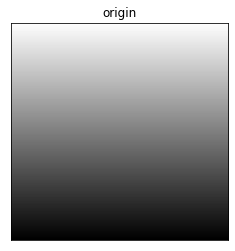

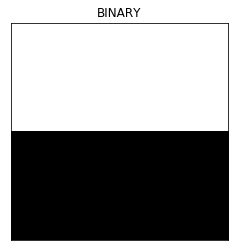

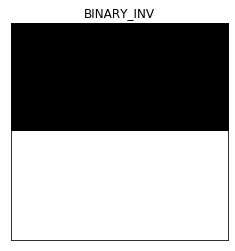

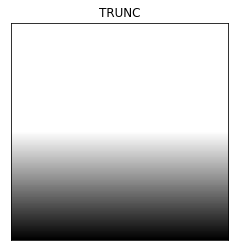

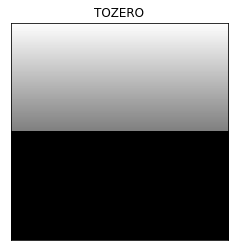

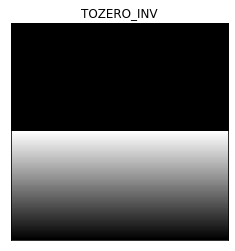

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/gradient.png', cv2.IMREAD_GRAYSCALE)
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['origin', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for title, img in zip(titles, images):
    plt.imshow(img, cmap='gray'), plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

### Adaptive Thresholding

앞의 simple thresholding에서는 threshold에 전역 값 한개를 사용했다. 하지만 이는 모든 경우에 좋은 방법이 아니다.(다른 장소에서 다른 조명을 받은 이미지를 예로 들 수 있다.)

이러한 경우에는 adaptive thresholding이 도움이 된다. adaptive thresholding의 알고리즘은 주변의 작은 영역을 기준으로 픽셀을 threshold 한다. 따라서, 같은 이미지의 다른 영역은 다른 threshold가 적용되며 이는 조명에 따라 변하는 이미지에서 좋은 결과를 얻을 수 있다.

`cv2.adaptiveThreshold()`는 앞의 simple thresholding의 파라미터들과 추가로 3개의 인자를 입력으로 받는다.

`adaptiveMethod` 파라미터는 threshold value가 계산되는 방법을 결정한다.
- `cv2.ADAPTIVE_THRESH_MEAN_C` : threshold value는 주변 영역의 평균에서 상수 C를 뺀 값이다.
- `cv2.ADAPTIVE_THRESH_GAUSSIAN_C` : threshold value는 주변 값들의 gaussian-weighted sum에서 상수 C를 뺀 값이다.

`blockSize` 파라미터는 주변 영역의 크기와 상수 C를 결정한다.

다음은 조명에 따라 변하는 이미지의 global thresholding과 adaptive thresholding을 비교한 예제이다.

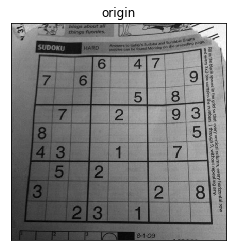

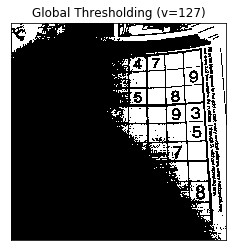

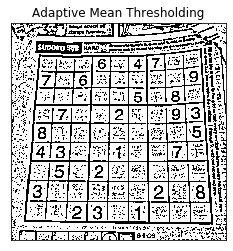

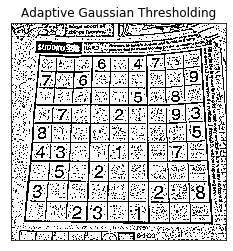

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)

ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                            cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                            cv2.THRESH_BINARY, 11, 2)

titles = ['origin', 'Global Thresholding (v=127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for title, img in zip(titles, images):
    plt.imshow(img, cmap='gray'), plt.title(title)
    plt.xticks([]), plt.yticks([])
    plt.show()

### Otsu's Binarization

앞의 global thresholding에서, threshold value는 임의로 결정되었다. Otsu's method는 value를 자동으로 결정해준다.

2가지 값만을 가지는 이미지를 생각해보자(bimodal image). 히스토그램은 2개의 peak만으로 구성될 것이며 적절한 threshold는 두 값의 중간일 것이다. Otsu's method는 이와 유사한 방법으로 이미지 히스토그램에서 최적의 global threshold value를 결정한다.

Otsu's method는 `cv2.threshold()` 함수에 `cv2.THRESH_OTSU`의 flag를 추가로 전달하면 된다. threshold value는 임의로 결정될 수 있다. 그 후 알고리즘은 최적의 threshold value를 찾은 후 첫번째 출력으로 반환한다.

아래 예제는 노이즈 필터링이 점차 향상되는 것을 보여준다. 입력 이미지로 노이즈가 낀 이미지가 사용되었다.

첫번째 방법은 value가 127인 global thresholding이 사용되었다. 두번째 방법은 Otsu's thresholding이 적용되었다. 세번째 방법은 5x5 gaussian kernel을 사용해 노이즈를 제거한 후 Otsu's thresholding이 적용되었다.

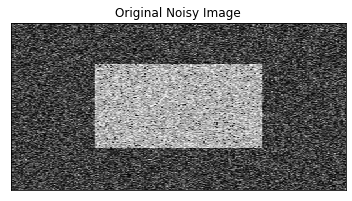

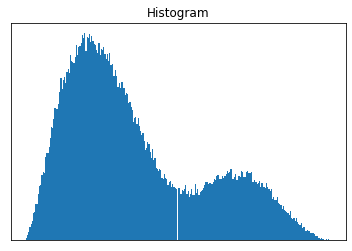

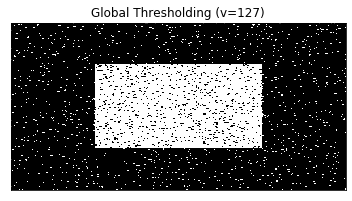

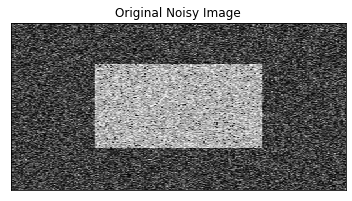

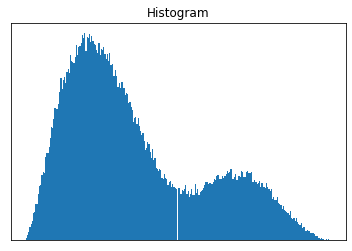

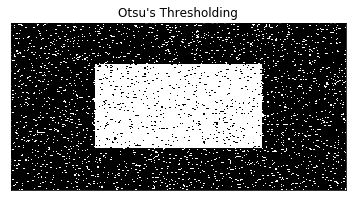

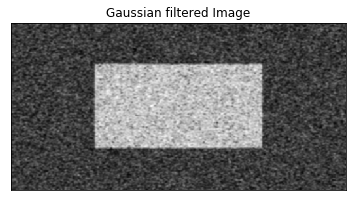

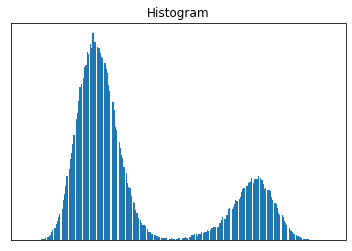

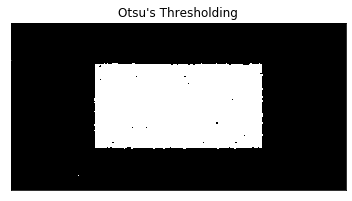

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/noisy.png', cv2.IMREAD_GRAYSCALE)

# 첫번째 방법 : global thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# 두번째 방법 : Otsu's thresholding
ret2, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# 세번째 방법 : gaussian filtering 후 Otsu's thresholding
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in range(3):
    plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.show()
    
    plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.show()
    
    plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
    plt.show()